In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#prepare data
data = pd.read_csv('_Datapreprocessing.csv', skiprows = 2, sep=",") #remove 2 rows
data.drop('1', axis = 1, inplace = True)

In [3]:
#y label for regression
x = data.iloc[:, 1:6]
y = data.iloc[:, 6]

In [4]:
#for missing values
imputerr = KNNImputer(n_neighbors = 2)
x.iloc[:, 1:4] = imputerr.fit_transform(data.iloc[:, 2:5])

In [5]:
#the whole data
pd.DataFrame(x)
pd.DataFrame(y)
not_nan_data = x.join(y)

In [6]:
#for string data
label = LabelEncoder()
not_nan_data['CountryCode'] = label.fit_transform(not_nan_data['CountryCode'] )

In [7]:
#for categorical data
not_categorical_data = pd.get_dummies(not_nan_data)
not_categorical_data.drop(['International Visitors_D'], axis=1, inplace=True)

In [8]:
not_categorical_data


,CountryCode,Population growth,Total population,Area (sq. km),Coronavirus Cases,International Visitors_A,International Visitors_B,International Visitors_C
0,0,0.817556,2.076529e+08,8358140.0,59324,0,1,0
1,1,1.077221,8.372098e+06,39516.0,29061,0,1,0
2,2,1.193867,8.266768e+07,348900.0,156727,1,0,0
3,3,0.834638,6.212341e+06,42262.0,8575,0,1,0
4,4,-0.008048,4.644396e+07,500210.0,223759,1,0,0
5,5,0.407491,6.689611e+07,547557.0,161488,1,0,0
6,9,-0.115284,1.269945e+08,364560.0,13231,0,1,0
7,6,-0.687543,1.074674e+07,128900.0,2506,0,0,1
8,8,1.148789,8.027743e+07,1628760.0,90481,0,0,0
9,10,2.924206,4.052584e+06,26936.0,3075,0,0,1


In [9]:
#for feature scaling
x_1 = pd.DataFrame(not_categorical_data.iloc[:, 0])
x_2 = not_categorical_data.iloc[:, 1:4]  #features need scaling
x_3 =  pd.DataFrame(not_categorical_data.iloc[:, 5:8])
y =  pd.DataFrame(not_categorical_data.iloc[:, 4])
transformer = StandardScaler()
d = transformer.fit_transform(x_2)
x_2_new = pd.DataFrame(d)
x_2_new.rename(columns={0:'Population growth', 1:'Total population', 2:'Area (sq. km)'}, inplace= True)

In [10]:
#whole data
data_feature_saling = x_1.join(x_2_new.join(x_3.join(y)))

In [11]:
data_feature_saling

,CountryCode,Population growth,Total population,Area (sq. km),International Visitors_A,International Visitors_B,International Visitors_C,Coronavirus Cases
0,0,-0.180705,0.190294,3.487210,0,1,0,59324
1,1,0.047911,-0.430316,-0.518157,0,1,0,29061
2,2,0.150608,-0.198941,-0.369191,1,0,0,156727
3,3,-0.165666,-0.437042,-0.516835,0,1,0,8575
4,4,-0.907588,-0.311750,-0.296336,1,0,0,223759
5,5,-0.541737,-0.248057,-0.273539,1,0,0,161488
6,9,-1.002001,-0.060896,-0.361651,0,1,0,13231
7,6,-1.505832,-0.422920,-0.475120,0,0,1,2506
8,8,0.110920,-0.206385,0.247054,0,0,0,90481
9,10,1.674043,-0.443768,-0.524215,0,0,1,3075


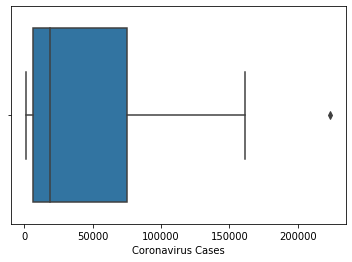

In [12]:
import seaborn as sns
sns.boxplot(x = data_feature_saling['Coronavirus Cases'])

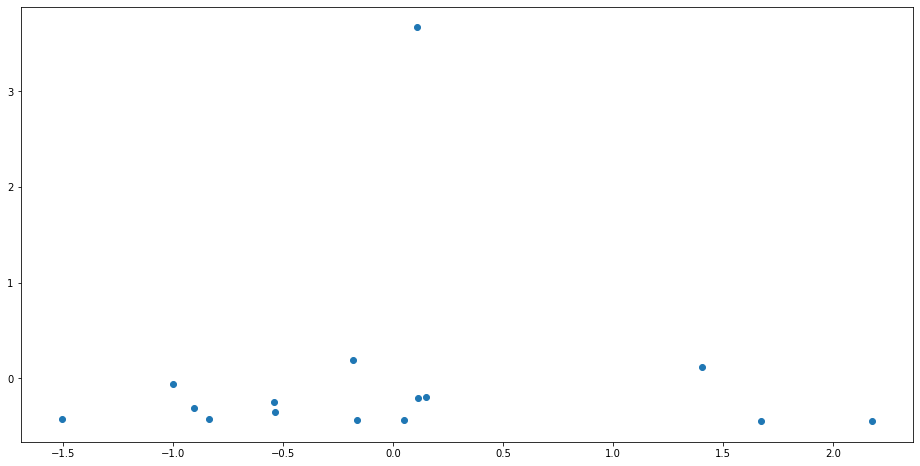

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (16, 8))
ax.scatter(data_feature_saling['Population growth'], data_feature_saling['Total population'])
plt.show()

In [14]:
from scipy import stats
z = np.abs(stats.zscore(data_feature_saling))
pd.DataFrame(z)

,0,1,2,3,4,5,6,7
0,1.620185,0.180705,0.190294,3.487210,0.5,1.224745,0.603023,0.078032
1,1.388730,0.047911,0.430316,0.518157,0.5,1.224745,0.603023,0.361669
2,1.157275,0.150608,0.198941,0.369191,2.0,0.816497,0.603023,1.493232
3,0.925820,0.165666,0.437042,0.516835,0.5,1.224745,0.603023,0.659316
4,0.694365,0.907588,0.311750,0.296336,2.0,0.816497,0.603023,2.467161
5,0.462910,0.541737,0.248057,0.273539,2.0,0.816497,0.603023,1.562406
6,0.462910,1.002001,0.060896,0.361651,0.5,1.224745,0.603023,0.591668
7,0.231455,1.505832,0.422920,0.475120,0.5,0.816497,1.658312,0.747495
8,0.231455,0.110920,0.206385,0.247054,0.5,0.816497,0.603023,0.530722
9,0.694365,1.674043,0.443768,0.524215,0.5,0.816497,1.658312,0.739228


In [15]:
print(np.where(z > 3))

(array([ 0, 14], dtype=int64), array([3, 2], dtype=int64))


In [16]:
z[0][3]

3.487209629108636

In [17]:
z[14][2]

3.6674117803334836

## IQR score

In [18]:
q1 = data_feature_saling.quantile(0.25)
q1

CountryCode                    3.500000
Population growth             -0.688743
Total population              -0.427932
Area (sq. km)                 -0.495977
International Visitors_A       0.000000
International Visitors_B       0.000000
International Visitors_C       0.000000
Coronavirus Cases           6311.000000
Name: 0.25, dtype: float64

In [19]:
q3 = data_feature_saling.quantile(0.75)
q3

CountryCode                    10.500000
Population growth               0.130764
Total population               -0.129918
Area (sq. km)                  -0.186096
International Visitors_A        0.000000
International Visitors_B        1.000000
International Visitors_C        0.500000
Coronavirus Cases           74902.500000
Name: 0.75, dtype: float64

In [20]:
IQR = q3 - q1
IQR

CountryCode                     7.000000
Population growth               0.819507
Total population                0.298013
Area (sq. km)                   0.309881
International Visitors_A        0.000000
International Visitors_B        1.000000
International Visitors_C        0.500000
Coronavirus Cases           68591.500000
dtype: float64

In [21]:
(data_feature_saling < q1 - 1.5*IQR) | (data_feature_saling > q1 + 1.5*IQR)

,CountryCode,Population growth,Total population,Area (sq. km),International Visitors_A,International Visitors_B,International Visitors_C,Coronavirus Cases
0,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,True
5,False,False,False,False,True,False,False,True
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,False
8,False,False,False,True,False,False,False,False
9,False,True,False,False,False,False,True,False


## Remove Outliers

In [22]:
data_outlier = data_feature_saling[(z < 3).all(axis = 1)]

In [23]:
data_outlier

,CountryCode,Population growth,Total population,Area (sq. km),International Visitors_A,International Visitors_B,International Visitors_C,Coronavirus Cases
1,1,0.047911,-0.430316,-0.518157,0,1,0,29061
2,2,0.150608,-0.198941,-0.369191,1,0,0,156727
3,3,-0.165666,-0.437042,-0.516835,0,1,0,8575
4,4,-0.907588,-0.311750,-0.296336,1,0,0,223759
5,5,-0.541737,-0.248057,-0.273539,1,0,0,161488
6,9,-1.002001,-0.060896,-0.361651,0,1,0,13231
7,6,-1.505832,-0.422920,-0.475120,0,0,1,2506
8,8,0.110920,-0.206385,0.247054,0,0,0,90481
9,10,1.674043,-0.443768,-0.524215,0,0,1,3075
10,11,-0.536627,-0.346528,-0.322293,0,0,1,4047


## outlier = Missing value

In [24]:
data_feature_saling.replace(data_feature_saling.iloc[0][3], np.nan, inplace=True)
data_feature_saling.replace(data_feature_saling.iloc[14][2], np.nan, inplace=True)

In [25]:
data_feature_saling

,CountryCode,Population growth,Total population,Area (sq. km),International Visitors_A,International Visitors_B,International Visitors_C,Coronavirus Cases
0,0,-0.180705,0.190294,NaN,0,1,0,59324
1,1,0.047911,-0.430316,-0.518157,0,1,0,29061
2,2,0.150608,-0.198941,-0.369191,1,0,0,156727
3,3,-0.165666,-0.437042,-0.516835,0,1,0,8575
4,4,-0.907588,-0.311750,-0.296336,1,0,0,223759
5,5,-0.541737,-0.248057,-0.273539,1,0,0,161488
6,9,-1.002001,-0.060896,-0.361651,0,1,0,13231
7,6,-1.505832,-0.422920,-0.475120,0,0,1,2506
8,8,0.110920,-0.206385,0.247054,0,0,0,90481
9,10,1.674043,-0.443768,-0.524215,0,0,1,3075


In [26]:
imputerr = KNNImputer(n_neighbors = 2)
data_feature_saling = imputerr.fit_transform(data_feature_saling)

In [27]:
oulier_data = pd.DataFrame(data_feature_saling)
z = np.abs(stats.zscore(oulier_data))
pd.DataFrame(z)

,0,1,2,3,4,5,6,7
0,1.620185,0.180705,2.287986,0.291456,0.5,1.224745,0.603023,0.078032
1,1.388730,0.047911,0.776755,0.760892,0.5,1.224745,0.603023,0.361669
2,1.157275,0.150608,0.365838,0.351163,2.0,0.816497,0.603023,1.493232
3,0.925820,0.165666,0.809970,0.757255,0.5,1.224745,0.603023,0.659316
4,0.694365,0.907588,0.191247,0.150778,2.0,0.816497,0.603023,2.467161
5,0.462910,0.541737,0.123287,0.088074,2.0,0.816497,0.603023,1.562406
6,0.462910,1.002001,1.047541,0.330424,0.5,1.224745,0.603023,0.591668
7,0.231455,1.505832,0.740235,0.642518,0.5,0.816497,1.658312,0.747495
8,0.231455,0.110920,0.329078,1.343804,0.5,0.816497,0.603023,0.530722
9,0.694365,1.674043,0.843184,0.777552,0.5,0.816497,1.658312,0.739228
